# Result analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plot style
sns.set_style('whitegrid')

In [2]:
%matplotlib inline  
sns.set(font_scale=1.5)  # crazy big

## Load dataset

In [3]:
df = pd.read_csv("data-policy-results.csv")

In [4]:
df.head()

,No,Policy type,5 years ago,Sharing mode,Adopt AEA
0,1,Require,No,Data repository,Yes
1,2,Require,Yes,Journal website,Yes
2,3,Require,Yes,Journal website,Yes
3,4,Require,Yes,Journal website,No
4,5,Require,No,Journal website,Yes


## First look

[Text(0,0,u'Require'), Text(0,0,u'Recommend'), Text(0,0,u'None')]

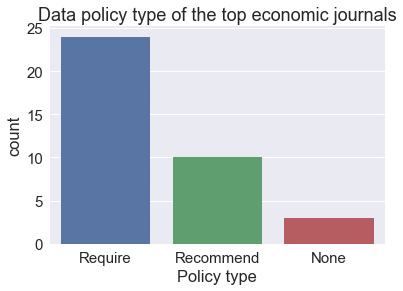

In [5]:
ax = sns.countplot(x='Policy type', data=df)
ax.set_title("Data policy type of the top economic journals")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


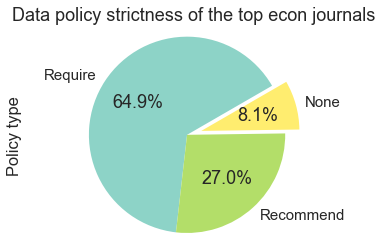

In [6]:
# same thing in pie plot
a = df['Policy type'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,3))
a.plot.pie(y=a.index,
           shadow=False,
           explode=(0, 0, 0.15),   
           startangle=30,
           autopct='%1.1f%%',
           title ="Data policy strictness of the top econ journals",
           colors=colors)
plt.axis('equal')

plt.savefig('img/policy-type.png', dpi=800)

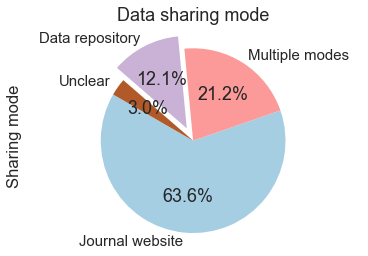

In [24]:
# same thing in pie plot
a = df['Sharing mode'].value_counts()
colors = plt.cm.Paired(np.linspace(0,1,4))
a.plot.pie(y=a.index,
           shadow=False,
           explode=(0, 0, 0.15, 0),   
           startangle=150,
           autopct='%1.1f%%',
           title ="Data sharing mode",
           colors=colors)
plt.axis('equal')

plt.savefig('img/sharing-mode-pie.png', dpi=800)

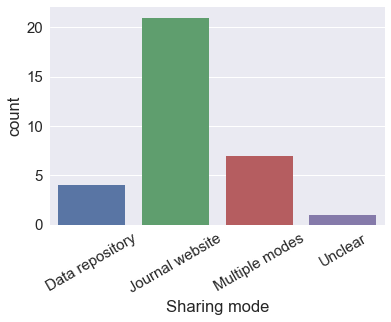

In [8]:
g = sns.countplot(x='Sharing mode', data=df, palette='deep')

#g = sns.barplot(x="Sharing mode", y=len(df"Sharing mode", data=df, estimator=lambda x: len(x) / len(df) * 100)
#g.set(ylabel="Percent")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.savefig('img/sharing-mode.png')

Text(0.5,1,u'Data policy exited 5 years ago')

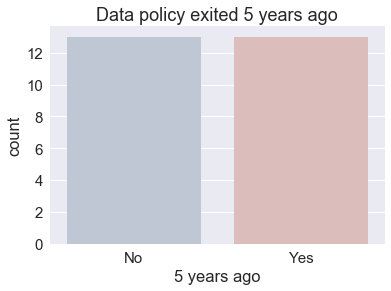

In [9]:
ax = sns.countplot(x='5 years ago', data=df, palette="vlag")
ax.set_title("Data policy exited 5 years ago")

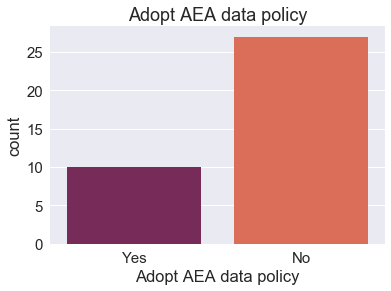

In [10]:
ax = sns.countplot(x='Adopt AEA', data=df, palette="rocket")
ax.set_title("Adopt AEA data policy")
ax.set_xlabel("Adopt AEA data policy")
plt.savefig('img/adopt-aea.png', dpi=800)

## More informative plots

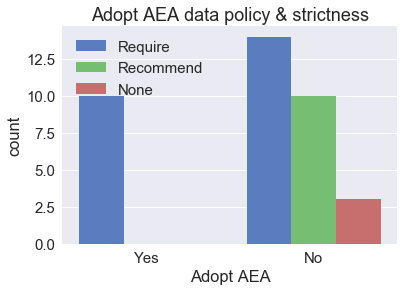

In [11]:
ax = sns.countplot(x='Adopt AEA', hue='Policy type', data=df, palette="muted")
#ax.set_title("Strictness of the policy when it adopts AEA model")
ax.set_title("Adopt AEA data policy & strictness")
# move legend out
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=2)
plt.savefig('img/adopt-aea-type.png', dpi=800)

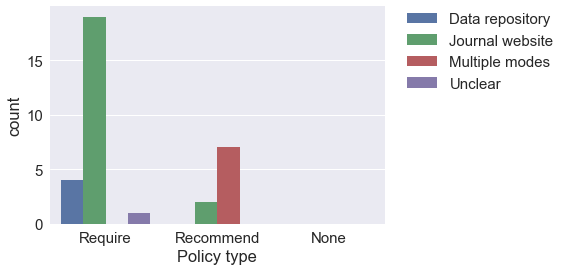

In [12]:
sns.countplot(x='Policy type', hue='Sharing mode', data=df)
# move legend out
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

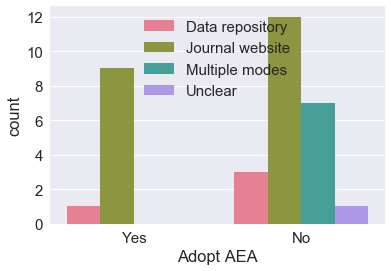

In [13]:
sns.countplot(x='Adopt AEA', hue='Sharing mode', data=df, palette="husl")
# move legend out
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=9)
plt.savefig('img/adopt-aea-mode.png')

## Compare status now and 5 years ago

In [14]:
# create new column to indicate if the policy exists today

# this is a helper method 
def policy_exist (row):
   if row['Policy type'] == 'Require':
      return 'Yes'
   if row['Policy type'] == 'Recommend':
      return 'Yes'
   return 'No'

# this creates a new column which says 'Yes' if the policy exists now
# and says 'No' if the policy doesn't exist
df['Policy'] = df.apply (lambda row: policy_exist (row), axis = 1)

In [15]:
df.head(10) # we can see the change here

,No,Policy type,5 years ago,Sharing mode,Adopt AEA,Policy
0,1,Require,No,Data repository,Yes,Yes
1,2,Require,Yes,Journal website,Yes,Yes
2,3,Require,Yes,Journal website,Yes,Yes
3,4,Require,Yes,Journal website,No,Yes
4,5,Require,No,Journal website,Yes,Yes
5,6,Recommend,NaN,Journal website,No,Yes
6,7,None,NaN,NaN,No,No
7,8,Require,Yes,Journal website,No,Yes
8,9,Recommend,No,NaN,No,Yes
9,10,Recommend,No,Multiple modes,No,Yes


Text(0.5,1,u'No of journals that have and do not have data policies')

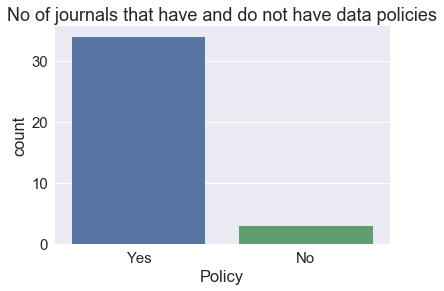

In [16]:
ax = sns.countplot(x='Policy', data=df)
ax.set_title('No of journals that have and do not have data policies')

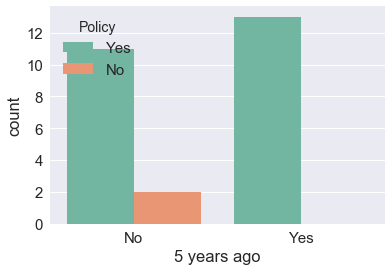

In [17]:
sns.countplot(x='5 years ago', hue='Policy', data=df, palette="Set2")

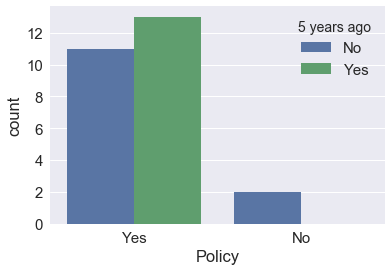

In [18]:
sns.countplot(x='Policy', hue='5 years ago', data=df)

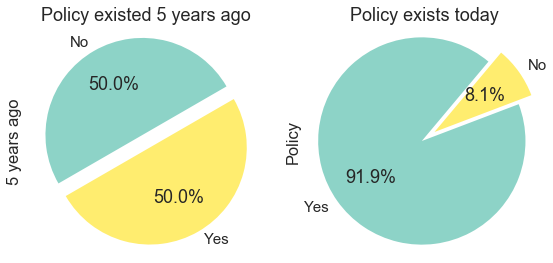

In [19]:
fig = plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
a = df['5 years ago'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,2))
a.plot.pie(y=a.index,
           shadow=False,
           explode=(0, 0.15),   
           startangle=30,
           autopct='%1.1f%%',
           title ="Policy existed 5 years ago",
           colors=colors)

plt.axis('equal')
plt.tight_layout()

plt.subplot(1, 2, 2)
b = df['Policy'].value_counts()
b.plot.pie(y=b.index,
           shadow=False,
           explode=(0, 0.15),   
           startangle=50,
           autopct='%1.1f%%',
           title ="Policy exists today",
           colors=colors)

plt.axis('equal')
plt.tight_layout()

fig.savefig('img/5-y-ago-and-today-pie.png', dpi=800)

In [20]:
a

No     13
Yes    13
Name: 5 years ago, dtype: int64

## Presents the difference from 5 years ago to today

In [21]:
gr = df.groupby(['5 years ago','Policy']).size().reset_index().rename(columns={0:'count'})
gr

,5 years ago,Policy,count
0,No,No,2
1,No,Yes,11
2,Yes,Yes,13


In [22]:
from matplotlib.sankey import Sankey

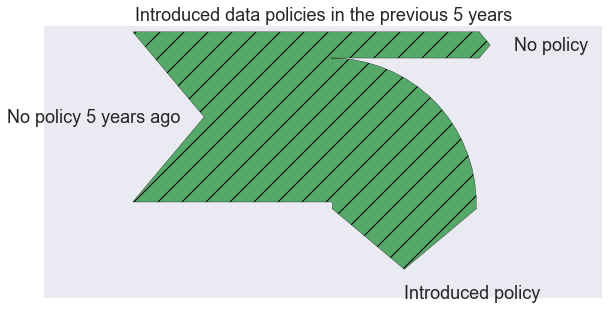

In [23]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Introduced data policies in the previous 5 years")

# hardcoded from the above
flows = [13, -2,-11]
labels = ["No policy 5 years ago", "No policy", "Introduced policy"]
sankey = Sankey(ax=ax, unit=None, offset=1.8, color='green')

sankey.add(flows=flows, 
           labels=labels,
           pathlengths = [.5,.2,.5],
           orientations=[0, 0,-1],
           trunklength=15)

diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')

# align text left
for d in diagrams:
    for t in d.texts:
        t.set_horizontalalignment('left')
d.texts[0].set_horizontalalignment('right')